In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [46]:
# http://faculty.salina.k-state.edu/tim/mVision/freq-domain/freq_filters.html

def ideal_BR(shape, r1, band_width, center=None):
    r2 = r1 + band_width
    if not center:
        center = shape[0]//2, shape[1]//2
    mask = np.ones(shape)
    for i in range(shape[0]):
        for j in range(shape[1]):
            dist = np.sqrt((center[0] - i)**2 + (center[1] - j)**2)
            if r1-band_width/2 <= dist <= r1 + band_width/2:
                mask[i, j] = 0
    return mask

def butterworth_BR(shape, r1, band_width, order=1, center=None):
    mask=np.ones(shape, np.float)
    if not center:
        center = shape[0]//2, shape[1]//2
    for u in range(shape[0]):
        for v in range(shape[1]):
            duv = np.sqrt((center[0] - u)**2 + (center[1] - v)**2)
            Huv = 1/(1+np.power(((duv*band_width)/(np.power(duv,2)-np.power(r1,2))),2*order))
            mask[u,v] = Huv
    return mask

def gaussian_BR(shape, r1, band_width, center=None):
    if not center:
        center = shape[0]//2, shape[1]//2
    mask=np.ones((shape[0], shape[1]), np.float)
    
    for u in range(shape[0]):
        for v in range(shape[1]):
            duv=np.sqrt((center[0] - u)**2 + (center[1] - v)**2)
            
            Huv=1-np.exp(-0.5*np.power((np.power(duv,2)-np.power(r1,2))/(duv*band_width),2))
            mask[u,v] = Huv
    return mask

In [55]:
a = np.array([1, 2,3])
b = np.array([1, 0, 3])

print(a/b)

[ 1. inf  1.]


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


(407, 551)


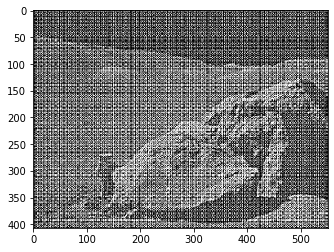

In [47]:
img = cv2.imread('nasa.png', cv2.IMREAD_GRAYSCALE)
# img = cv2.resize(img, (256, 256))

print(img.shape)
plt.imshow(img, cmap='gray');

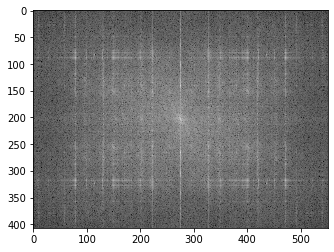

In [48]:
f = np.fft.fft2(img)
f = np.fft.fftshift(f)

plt.imshow(20*np.log(np.absolute(f)), cmap='gray');

Please enter the mask number : 2
Please input Radial center :  100
Please input width of the band :  40


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in double_scalars


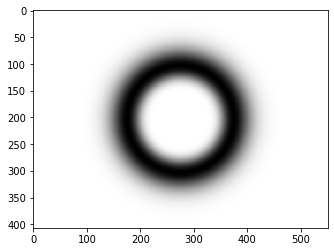

In [53]:
opt = 3
order = 2
d0 = 60
W = 40

opt = int(input('Please enter the mask number :'))

d0 = int(input('Please input Radial center : '))
W = int(input('Please input width of the band : '))
# plt.figure(figsize=(20, 20))
mask = butterworth_BR(img.shape, d0, W, order)
if opt == 1:
    mask = ideal_BR(img.shape, d0, W)
elif opt == 2:
    mask = gaussian_BR(img.shape, d0, W)
elif opt == 3:
    
    order = int(input('Please enter the order : '))
    mask = butterworth_BR(img.shape, d0, W, order)

plt.imshow(mask, cmap='gray');




0.9162726595735453


/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


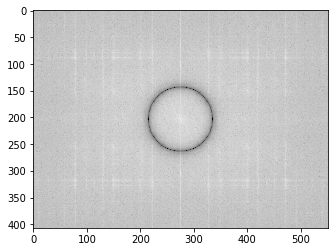

In [41]:
masked_f = f * mask

print(mask.mean())

# cv2.imshow('dsaf', scaled_masked_f)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

plt.imshow(20*np.log(np.absolute(masked_f)), cmap='gray');

In [ ]:
res_img = np.fft.ifftshift(masked_f)
res_img = np.real(np.fft.ifft2(res_img))

plt.imshow(res_img, cmap='gray');